# Building a Decision Tree to Classify Heart Disease

## Project Description

In this project, I construct a decision tree that classifies patients with heart disease. Accuracy of the classification tree is improved using *cost complexity pruning* and *k-fold cross validation*. The result is a decision tree that performs very well at classifying cases of heart disease. The tree is 76.9% accurate at classifying patients who do not have heart disease, and it is 81.0% accurate at classifying patients that do have heart disease.

## The Main Challenges and the Overall Aim

Given a dataset containing patient health information, I need to construct a decision tree that successfully classifies patients with heart disease. To be successful, the decision tree must achieve an accuracy score that is greater or equal to 70%. 

## Methodology and Strategy

I employ several data science tools and techniques to achieve the overall aim of the project. The project proceeds in the following way.
1. Import the libraries and data.
2. Perform exploratory data analysis.
3. Cleanse and process the data.
4. Build and evaluate a decision tree.
5. Employ cost coomplexity pruning.
6. Employ k-folds cross validation. 
7. Construct and evaluate the improved tree.
8. Summarize the project and results.

## Acknowledgements

The data set used in this project is called "Heart Disease Dataset", and can be found at the UCI Machine Learning Repository here: https://archive.ics.uci.edu/ml/datasets/heart+disease

Special thanks to the researchers who compiled the data: Andras Janosi, M.D., William Steinbrunn, M.D., Matthias Pfisterer, M.D., and Robert Detrano, M.D., Ph.D.

## 1. Import Libraries and Modules

In [1]:
import pandas as pd # For loading, manipulating, and One-hot encoding data
import numpy as np # Used for certain computations like calculating the mean, median, and standard deviation

import matplotlib.pyplot as plt # Used to plot graphs
import seaborn as sns # Another useful tool for making graphs

from sklearn.tree import DecisionTreeClassifier # Building a classification tree
from sklearn.tree import plot_tree # Plotting classification trees
from sklearn.model_selection import train_test_split # To split  the data into training and testing sets
from sklearn.model_selection import cross_val_score # For using cross validation
from sklearn.metrics import confusion_matrix # Constructing a confusion matrix
from sklearn.metrics import plot_confusion_matrix # Plotting confusion matrix

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

print("Libraries Imported")

Libraries Imported


## 2. Import Data

In [2]:
# Assign the UCI Machine Learning Repository URL link with the data to a variable, 'url'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
# Load the data
df_load = pd.read_csv(url, header = None) # Note that the dataset does not contain headers

# Display the first five rows
df_load.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2.1 Inspect the Data

In [4]:
# Display the first five rows
df_load.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Display the last five rows
df_load.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
# Look at the shae
df_load.shape

(303, 14)

In [7]:
# Examine the dataframe using 'info()'
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Observations:**
1. There are 303 entries.
2. There are 14 columns.
3. The majority of the values are numeric. But there are two features that contain strings.
4. There were no headers associated with the original dataset. Consequently, we have numbers for the columns rather than strings that provide more meaning. 

**Remark:** The header names are available at the UCI Machine Learning Repository site where I retrieved the data. I will insert the header names in the following section.

### 2.2 Correct the Column Names

Givne the attirbute descriptions for the UCI Machine Learning Repository, we can replace the header with more meaningful column names. The original attribute names are the following:
1. age 
2. sex (a category for a patient's sex, where 1 = male and 0 = female)
3. cp (a category for chest pain, where 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, and 4 = asymptomatic)
4. trestbps (resting blood pressure in mm Hg)
5. chol (cholestoral in mg/dl)
6. fbs (a category representing fasting blood sugar > 120 mg/dl, where 1 = true and 0 = false)
7. restecg (a category representing resting electrocardiographic results, where value 0 = normal, value 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), and value 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach (maximum heart rate achieved)
9. exang (a category representing exercise induced angina, where 1 = yes and 0 = no)
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope ( a category representing the slope of the peak exercise ST segment, where a value of 1 = upsloping, a value of 2 = flat, and a value of 3 = downsloping)
12. ca (number of major vessels (0-3) colored by flourosopy)
13. thal (a category representing a thalium heart scan, where 3 = normal, 6 = fixed defect, and 7 = reversable defect)
14. num (a category representing a diagnosis of heart disease - i.e., the predicted attribute)

In [8]:
# Create the column names using a list
headers = ["Age",
           "Sex", 
           "CP", 
           "Rest BP", 
           "Cholestoral", 
           "FBS", 
           "Rest ECG", 
           "Thalach", 
           "Exang", 
           "Old Peak", 
           "Slope", 
           "CA", 
           "Thal", 
           "Heart Disease"]

In [9]:
# Assign the new headers to the dataset
df_load.columns = headers

# Display the first five rows
df_load.head()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Exploratory Data Analysis

Before I cleanse and process the data, it would be beneficial to perform some exploratory data analysis. Doing so will illuminate some of the underlying features and trends in the data.

### 3.1 Summary Statistics Including the Averages, Minimum Values, and Maximum Values

In [10]:
# The average resting blood pressure
print("average resting BP = ", df_load["Rest BP"].mean())

average resting BP =  131.68976897689768


In [11]:
# The average Cholestoral levels
print("average cholestoral = ", df_load["Cholestoral"].mean())

average cholestoral =  246.69306930693068


In [12]:
# The highest Cholestoral level
print("highest cholestoral = ", df_load["Cholestoral"].max())

highest cholestoral =  564.0


In [13]:
# The youngest patient
print("minimum age = ", df_load["Age"].min())

minimum age =  29.0


In [14]:
# The oldest patient
print("maximum age = ", df_load["Age"].max())

maximum age =  77.0


In [15]:
# The maximum heart rate achieved - i.e., Thalach
print("Thalach = ", df_load["Thalach"].max())

Thalach =  202.0


In [16]:
# Generate summary statistics
df_load.describe()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### 3.2 Drill Down

My exploration has uncovered a few interesting things. Let's take a closer look at the youngest patient, the oldest patient, the patient with the highest cholestoral levels, and the patient with a maximum heart rate of 202.

In [17]:
# The youngest patient
df_load[df_load["Age"] == 29.00]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0


In [18]:
# The oldest patient
df_load[df_load["Age"] == 77.00]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
161,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4


In [19]:
# The patient with the highest cholestoral levels
df_load[df_load["Cholestoral"] == 564.0]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


**Observations:**
1. One interesting observation is that the youngest patient is also the individual who had the highest value for "Thalach" (maximum heart rate achieved).
2. The oldest patient had exercise induced angina.
3. The patient with the highest cholestoral was female.

### 3.3 Data Visualizations

#### Scatter Plots

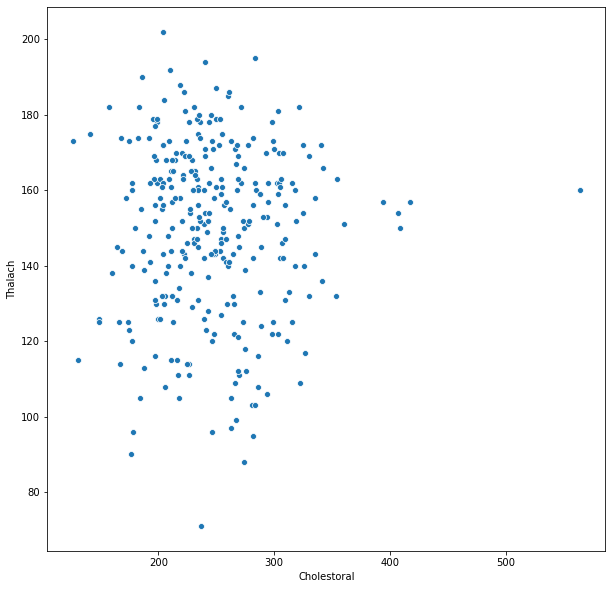

In [20]:
# Construct a scatter plot with "Cholestoral" on the x - axis and "Thalach" on the y - axis
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df_load, x="Cholestoral", y="Thalach")

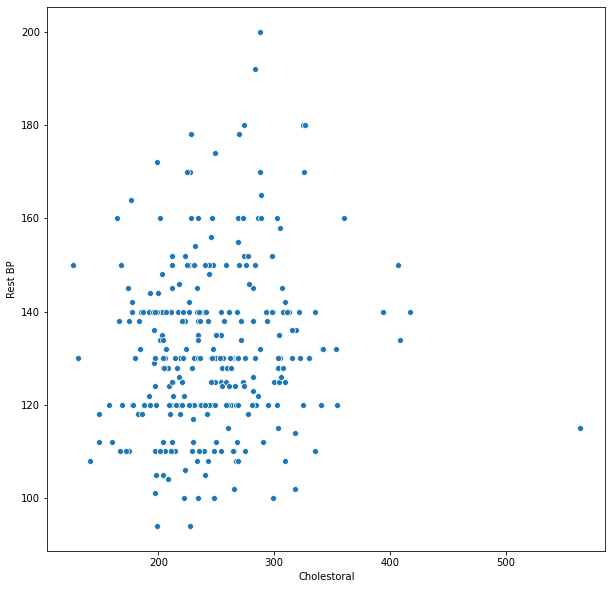

In [21]:
# Construct a scatter plot with "Cholestoral" on the x - axis and "Rest BP" on the y - axis
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df_load, x="Cholestoral", y="Rest BP")

#### Histograms

Text(0, 0.5, 'Frequency')

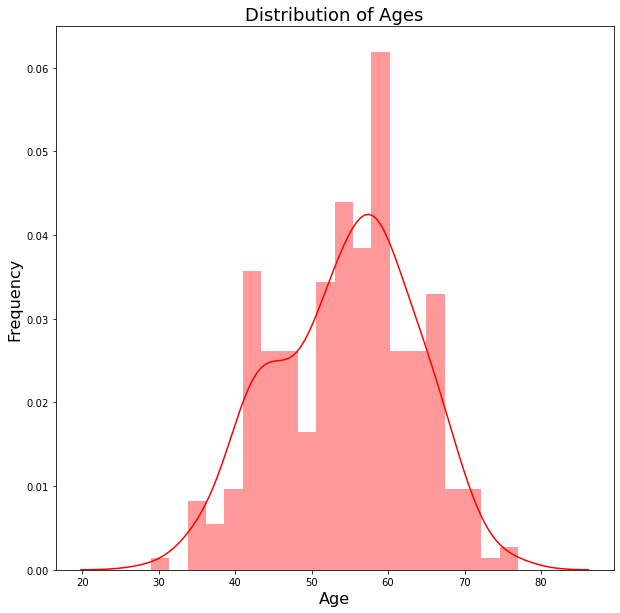

In [22]:
# Histogram of "Age"
plt.figure(figsize = (10, 10))
sns.distplot(df_load["Age"], color = "red", kde = True, bins = 20)
plt.title("Distribution of Ages", fontsize=18)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

Text(0, 0.5, 'Frequency')

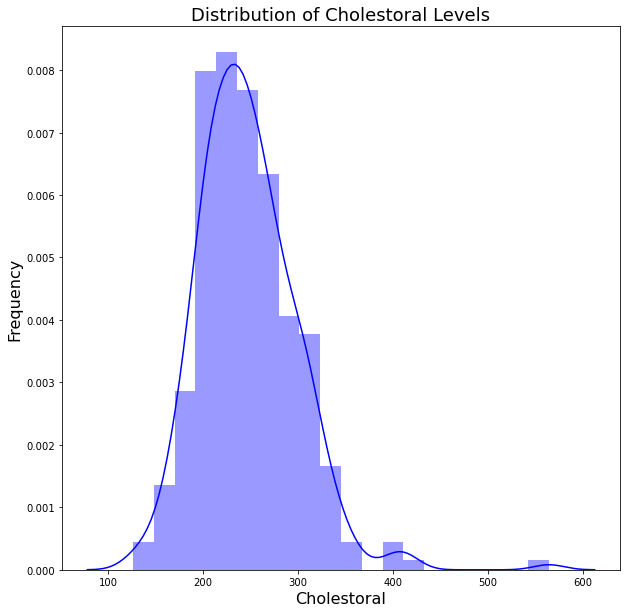

In [23]:
# Histogram of "Cholestoral"
plt.figure(figsize = (10, 10))
sns.distplot(df_load["Cholestoral"], color = "blue", kde = True, bins = 20)
plt.title("Distribution of Cholestoral Levels", fontsize=18)
plt.xlabel("Cholestoral", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

#### Box Plots

<Figure size 1440x1440 with 0 Axes>

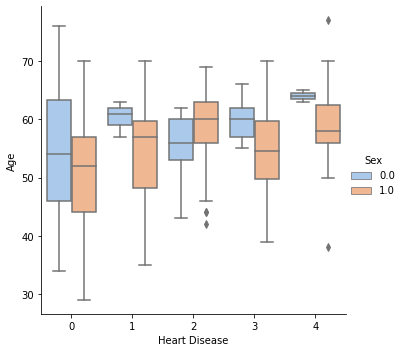

In [24]:
# Box plot for 'Heart Disease' with regards to "Age" and "Sex"
plt.figure(figsize = (20, 20))
sns.catplot(x="Heart Disease", y="Age", hue = "Sex", palette = "pastel", kind="box", data=df_load)

#### Count Plots

<Figure size 720x720 with 0 Axes>

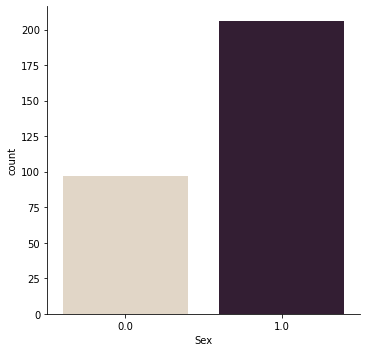

In [25]:
# Count plot for "Sex"
plt.figure(figsize = (10, 10))
sns.catplot(x="Sex", kind="count", palette="ch:.25", data=df_load)

### 3.4  A Brief Look at Correlation

It might be interesting to look at the correlation values. Afterwards, I'll plot a heat map to illustrate the different correlations that hold between the features in the data frame.

In [26]:
# Generate correlation values
df_load.corr()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,Heart Disease
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
Sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
CP,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
Rest BP,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
Cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
FBS,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
Rest ECG,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
Thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
Exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
Old Peak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


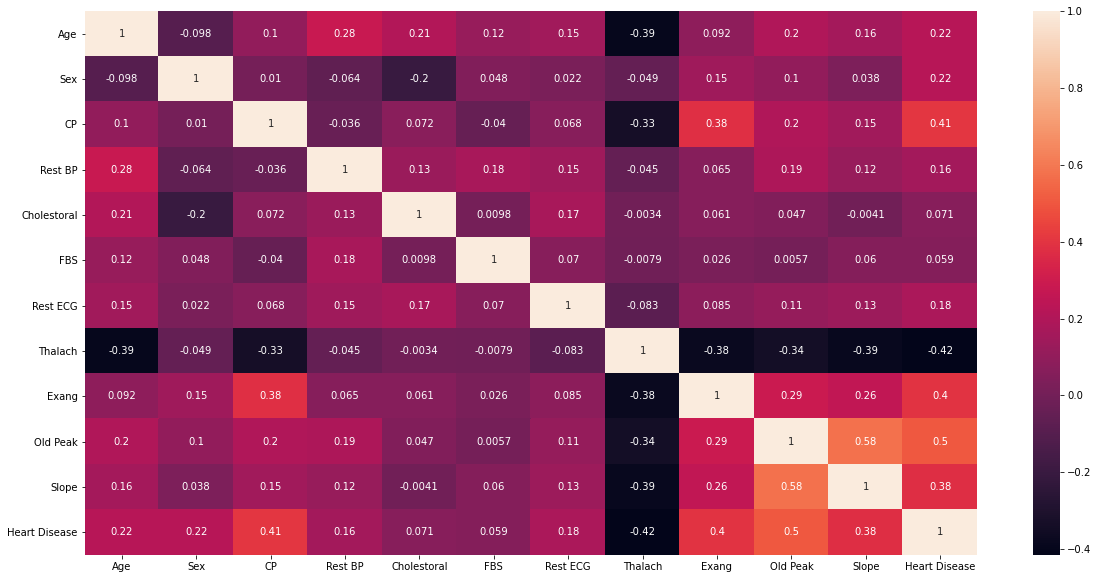

In [27]:
# Visualize the correlation values with a heat map
correlations = df_load.corr()

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot=True)

## 4. Data Cleansing and Processing

In this section I'm going to clean and prepare the data.

### 4.1 Missing Values

In this section I will locate and missing or null values in the data frame. Any null values will be imputed or handled appropriately.

#### Visualizing Missing Values with a heat map

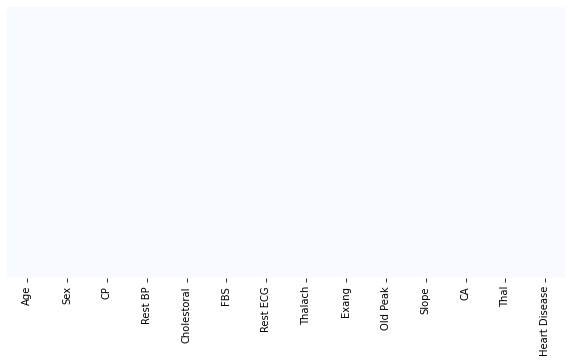

In [28]:
# heatmap to visualize any null values in the data frame
plt.figure(figsize = (10, 5))
sns.heatmap(df_load.isnull(), yticklabels=False, cbar=False, cmap="Blues")

**Remark:** The heat map does not show any large amounts of missing data. In fact, the heat map doesn't seem to show the existence of any null values. However, it is still possible that there is still a very small number of null values in the data frame.

In [29]:
# Alternative way to check for null values
df_load.isnull().sum()

Age              0
Sex              0
CP               0
Rest BP          0
Cholestoral      0
FBS              0
Rest ECG         0
Thalach          0
Exang            0
Old Peak         0
Slope            0
CA               0
Thal             0
Heart Disease    0
dtype: int64

**Remark:** We are not missing any values. But let's check double check the data types and look to see if there are any unusual strings in the data that imply null values.

#### Check Data Types

In [30]:
# Use 'df_types' to check the types of data in the data frame, 'df_load'
df_load.dtypes

Age              float64
Sex              float64
CP               float64
Rest BP          float64
Cholestoral      float64
FBS              float64
Rest ECG         float64
Thalach          float64
Exang            float64
Old Peak         float64
Slope            float64
CA                object
Thal              object
Heart Disease      int64
dtype: object

**Reamark:** Again, we see that columns "CA" and "Thal" do not contain purely numveric values (either integers or floats). These columns can contain strings.

#### Check Unique Values for "CA" and "Thall"

In [31]:
# Unique values for "CA"
df_load["CA"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [32]:
# Unique values for "Thal"
df_load["Thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**Remark:** One of the values in these columns is "?", which implies an unknown or missing value. Consequently, we need to properly handle any instance where "?" occurs in the data.

**Important Note:** The values in the "CA" and "Thal" columns appear to be whole numbers. Consequently, imputing missing values these values with the mean or average will likely not be appropriate. If I do impute these missing values (rather than remove them from the data frame), then I should use the median or mode.

#### Determine the Number of Rows that Contain "?"

In [33]:
# Search the "CA" column for instances of "?"
len(df_load.loc[df_load["CA"] == "?"])

4

In [34]:
# Search the "Thal" column for instances of "?"
len(df_load.loc[df_load["Thal"] == "?"])

2

**Remark:** There are 6 instances of "?". Let us take a closer look at these rows.

In [35]:
# Examine the rows in "CA" with "?"
df_load.loc[(df_load["CA"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [36]:
# Examine the rows in "Thal" with "?"
df_load.loc[(df_load["Thal"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


**Remark:** There are a couple available options. First, we could impute an instance of missing data marked by "?" with the mean value for that variable. Second, we could simply eliminate any row that contains a "?". Given that there are over 300 rows of data, removing 6 rows that contain "?" will not have a major impact on the construction of a decision tree. Either option would seem to work. But I will simply remove these rows

#### Imputing Missing Values

I'll first retrieve a dataset that does not contain any row with missing values.

In [37]:
# Display the shape of the data frame
df_load.shape

(303, 14)

In [38]:
# Create a data frame, 'df_complete', that does not contain the rows with missing data
df_complete = df_load.loc[(df_load["CA"] != "?") & (df_load["Thal"] != "?")]

# Display the shape of 'df_complete' to compare it to 'df_load'
df_complete.shape

(297, 14)

Next, I will convert the values in "CA" and "Thal" to floats.

In [39]:
# Convert to floats
df_complete["CA"] = df_complete["CA"].astype(float)
df_complete["Thal"] = df_complete["Thal"].astype(float)

# Check the data types
df_complete.dtypes

Age              float64
Sex              float64
CP               float64
Rest BP          float64
Cholestoral      float64
FBS              float64
Rest ECG         float64
Thalach          float64
Exang            float64
Old Peak         float64
Slope            float64
CA               float64
Thal             float64
Heart Disease      int64
dtype: object

Next, I'll determine the modes for the "Thal" and "CA" columns in "df_complete". Afterwards, I'll use those values to impute the missing values in "df_load".

In [40]:
# Determine the mode for "CA"
df_complete["CA"].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: CA, dtype: int64

In [41]:
# Determine the mode for "Thal"
df_complete["Thal"].value_counts()

3.0    164
7.0    115
6.0     18
Name: Thal, dtype: int64

The mode for the "CA" column is 0.0 and the mode for the "Thal column is 3.0. Now, let's impute the missing values in "df_load" with the appropriate modes.

In [42]:
# Replace "?" with the mode for the "CA" column
df_load["CA"].replace("?", 0.0, inplace = True)

# Replace "?" withe the mean for the "Thal column
df_load["Thal"].replace("?", 3.0, inplace = True)

In [43]:
# Check for any instance of "?" in the "CA" column
df_load.loc[(df_load["CA"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease


In [44]:
# Check for any instance of "?" in the "Thal" column
df_load.loc[(df_load["Thal"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease


In [45]:
# check unique values in "CA" column
df_load["CA"].unique()

array(['0.0', '3.0', '2.0', '1.0', 0.0], dtype=object)

In [46]:
# Check unique values in "Thal" column
df_load["Thal"].unique()

array(['6.0', '3.0', '7.0', 3.0], dtype=object)

**Remark:** I have successfully imputed the missing values.

### 4.2 Splitting the Data: Independent Variables and the Dependent Variable

At this point, I need to split the data frame, *df_load*, into two different data frames: **X** and **y**. The data frame, *X* will contain the independent variables, and the data frame, *y*, will contain the dependent variable, *Heart Disease*. Note that when I create *X* and *y* from *df_load*, I will use the *copy()* function so that any manipulation of the split data will not affect *df_load*.

In [47]:
# Create the 'X' data frame containing the independent variables
X = df_load.drop("Heart Disease", axis = 1).copy()

# Display the first five rows of 'X'
X.head()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [48]:
# Create 'y' which contains the dependent variable
y = df_load["Heart Disease"].copy()

# Display the first five rows of 'y'
y.head()

0    0
1    2
2    1
3    0
4    0
Name: Heart Disease, dtype: int64

### 4.3 One-hot Encoding

At this point, I need to check the types of unique values in *X* and *y* and compare them with the information in section 2.2 concerning whether the data is properly understood to be a float or categorical. 

**Note:** The features that have values representing categories are: *Sex*, *CP*, *Exang*, *Thal*, *Slope*, *Rest ECG*, *FBS*, and *Heart Disease*.

In [49]:
# Check the unique value types in "CP"
X["CP"].unique()

array([1., 4., 3., 2.])

In [50]:
# Check the unique value types in "Sex"
X["Sex"].unique()

array([1., 0.])

In [51]:
# Check the unique value types in "Exang"
X["Exang"].unique()

array([0., 1.])

In [52]:
# Check the unique value types in "Rest ECG"
X["Rest ECG"].unique()

array([2., 0., 1.])

In [53]:
# Check the unique value types in "Slope"
X["Slope"].unique()

array([3., 2., 1.])

In [54]:
# Check the unique value types in "Thal"
X["Thal"].unique()

array(['6.0', '3.0', '7.0', 3.0], dtype=object)

In [55]:
# Check the unique value types in "y"
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Note that the values in *y* represent the different kinds of diagnoses for heart disease. '0' means there is no heart disease, and the rest of the values represent various types of heart disease.

**Remark:** The values look good and seem to correctly represent categories.

#### One-hot Encoding

I'll use *get_dummies()* to perform one-hot encoding on the relevant features. we only need to one-hot encode the variables with more than 2 types of unique values: *CP*, *Rest ECG*, *Slope*, *Thal*, and *Heart Disease*. The other variables with unique values of only 0 and 1 (*Sex*, *FBS*, and *Exang*) don't need to be one-hot encoded since they only have 2 types of values.

In [56]:
# Perform one-hot encoding on the 'X' data frame and create a new data frame with the result
X_onehot = pd.get_dummies(X, columns = ["CP", "Rest ECG", "Slope", "Thal"])

# Display the first five rows
X_onehot.head()

,Age,Sex,Rest BP,Cholestoral,FBS,Thalach,Exang,Old Peak,CA,CP_1.0,...,Rest ECG_0.0,Rest ECG_1.0,Rest ECG_2.0,Slope_1.0,Slope_2.0,Slope_3.0,Thal_3.0,Thal_3.0,Thal_6.0,Thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,1,0,0,1,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,0,0,1,0,1,0,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,0,0,1,0,1,0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,1,0,0,0,0,1,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,1,1,0,0,0,1,0,0


The classification tree I will make is concerned with whether a patient has heart disease or not. Consequently, I need to make a new variable that includes the only he values in *y* that are greater than 0. Recall that a value of 0 for "Heart Disease" means that the patient does not have heart disease. So I will convert all of the numbers greater than 0 to 1 to represent the property of heart disease.

In [57]:
# Get numbers greater than 0
y_no_zero_index = y > 0

# Access and convert the numbers greater than 0 to 1
y[y_no_zero_index] = 1

# Display the unique values
y.unique()

array([0, 1], dtype=int64)

## 5. Constructing an Initial Classification Tree

Now that the data is cleansed and processed, I can create an initial classification tree. Afterwards, I'll evaluate the tree and employ *Cost Complexity Pruning* to help develop the optimal decision tree.

### 5.1 Splitting the Data into a Testing Set and a Training Set

In [58]:
# Use the train_test_split() function 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 5.2 Construct a Decision Tree and Fit the Tree to the Training Data

In [59]:
# Create a decision tree
dt = DecisionTreeClassifier(random_state=42)

# Fit the tree to the training data
dt = dt.fit(X_train, y_train)

### 5.3 Run the Tree on the Testing Data and Evaluate its Performance Using a Confusion Matrix

<Figure size 720x720 with 0 Axes>

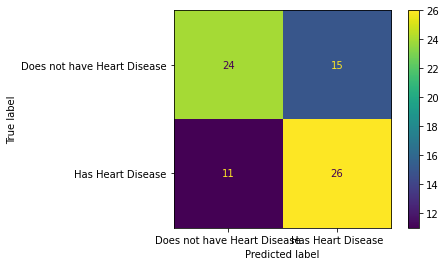

In [60]:
# Employ the decision tree on the test set and plot a confusion matrix with labels
plt.figure(figsize = (10, 10))
plot_confusion_matrix(dt, X_test, y_test, display_labels=["Does not have Heart Disease", "Has Heart Disease"])

**Observation:** Of the 39 people (24 + 15) that *do not have heart disease*, 24 of them were classified correctly (61.5%). Of the 37 people (11 + 26) that *have heart disease*, 26 were correctly classified (70.27%). The decision tree might have issues due to over fitting. To combat this, we can prune the tree to get better results.

## 6. Cost Complexity Pruning

In this section, I will employ *Cost Complexity Pruning* to overcome over fitting of the model. This should allow us to get better results. I need to determine the optimal value for *alpha*, which dicatates the level of pruning. To do this, I'll plot the accuracy of the decision tree as a function for different values of that are assigned to alpha.

### 6.1 Determing the Optimal alpha

In [61]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1] # This code will omit the maximum value for alpha so that we do not remove every leaf

dts = [] # Store our array of classification decision trees

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    dt.fit(X_train, y_train) # fit to the training data
    dts.append(dt) # Append to the list of decision trees

Now, I can plot the accuracy of each decision tree by using the training set and the test set as a function of alpha.

<Figure size 1440x1440 with 0 Axes>

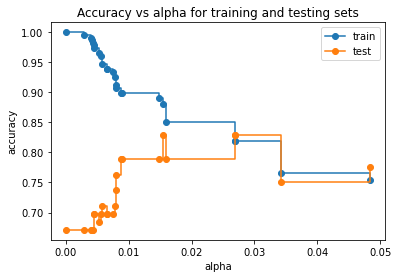

In [62]:
# Create lists containing the training scores and test scores
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

# Create the plot to determine optimal alpha
plt.figure(figsize = (20, 20))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Observation:** The graph shows that the test set's accuracy peaks when alpha is around 0.15. Once we pass this point, the accuracy for the training set continues to drop. Hence, I'll set ccp_alpha to 0.15.

**Issue:** There are numerous ways to split the data into different partions of training and testing sets. One salient question is: did we make the best split of our data and subsequently get the best training and testing sets? For instance, it is possible that a different split will lead to another value for alpha. We can demonstrate this with the following example.

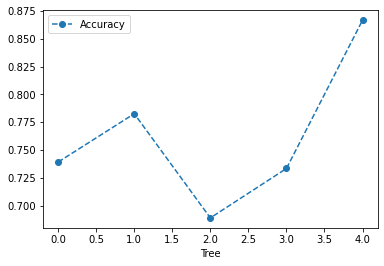

In [63]:
# Demonstrate that different accuracies can be generated with different training and testing sets
dt_ex = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.015)
scores_ex = cross_val_score(dt_ex, X_train, y_train, cv = 5)
df_ex = pd.DataFrame(data = {"Tree":range(5), "Accuracy":scores_ex})

# Plot the accuracies
df_ex.plot(x = "Tree", y = "Accuracy", marker = "o", linestyle = "--")

**Strategy:** I will address these concerns with **k-fold Cross Validation** using the *cross_val_score()* function.

### 6.2 K-fold Cross Validation

The strategy is to employ k-fold cross validation to determine the best value for the cost complexity pruning parameter, alpha (ccp_alpha).

<Figure size 720x720 with 0 Axes>

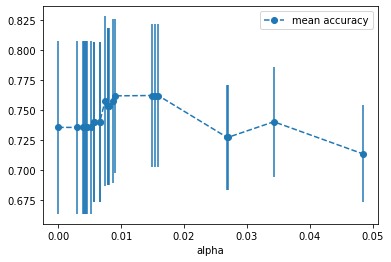

In [64]:
# empty list to store the different values for alpha generated using the following for loop
alpha_values = []

# Create a for loop that creates different decision trees with different alphas and produces accuracy scores
for ccp_alpha in ccp_alphas:
    loop_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    loop_scores = cross_val_score(loop_dt, X_train, y_train, cv = 5)
    alpha_values.append([ccp_alpha, np.mean(loop_scores), np.std(loop_scores)])
    
# Create a data frame
alpha_results = pd.DataFrame(alpha_values, columns = ["alpha", "mean accuracy", "std"])

# Plot the results
plt.figure(figsize=(10,10))
alpha_results.plot(x = "alpha",
                   y = "mean accuracy",
                   yerr = "std",
                   marker = "o",
                   linestyle = "--")

**Note:** The points in the plot represent the mean values whereas the vertical lines represent the standard deviation.

**Observation:** The plot seems to show that our alpha values should be a little higher at around 0.016.

**Strategy:** Identify the best alpha value given the mean accuracy and standard deviation values.

In [65]:
# Select alpha values that are greater than 0.015 and less than 0.016
alpha_results[(alpha_results["alpha"] > 0.015) & (alpha_results["alpha"] < 0.017)]

,alpha,mean accuracy,std
19,0.015419,0.762126,0.060116
20,0.015907,0.762126,0.060116


**Remark:** Both scores have the same accuracy. I'll use the score assigned to index 20 for the decision tree.

In [66]:
# save the best alpha value
best_alpha = 0.015907

## 7. Constructing and Evaluating the Final Decision Tree

### 7.1 Build the Decision Tree

Now that I have the best alpha score, I can create a decision tree that should produce the best results.

In [67]:
# Build the tree
dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = best_alpha)

# Fit the tree to the training data
dt_pruned = dt_pruned.fit(X_train, y_train)

### 7.2 Evaluate the Decision Tree

I'll create a new confusion matrix that indicates the accuracy of the tree.

<Figure size 720x720 with 0 Axes>

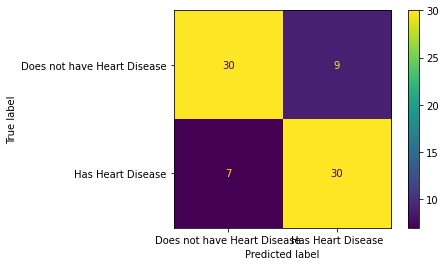

In [68]:
# Create the confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(dt_pruned, X_test, y_test, display_labels=["Does not have Heart Disease", "Has Heart Disease"])

**Observation:** The confusion matrix shows that out of the 39 people (30 +9) who *do not have heart disease*, 30 were classified *correctly*. That means we achieved **76.92%** accuracy. Moreover, out of the 37 people (7 + 30) who *do have heart disease*, 30 were classified *correctly*. That means we achieved **81.08%** accuracy.

**Results:** The pruned tree that I created is superior than the original, full tree. First, the pruned tree was 76.92% accurate when classifying patients without heard disease. On the other hand, the original, full tree only achieved an accuracy of 61.5% when classifying patients without heart disease. Second, the pruned tree was 81.08% accuate when classifying patients with heart disease. The original tree, however, only achieved 70.27% accuracy when classifying patients with heart disease.

## 8. Visualize the Decision Tree

I can plot the decision tree with all of its nodes.

[Text(558.0, 475.65000000000003, 'CP <= 3.5\ngini = 0.495\nsamples = 227\nvalue = [125, 102]\nclass = No Heart Disease'),
 Text(223.2, 339.75, 'Age <= 56.5\ngini = 0.343\nsamples = 123\nvalue = [96, 27]\nclass = No Heart Disease'),
 Text(111.6, 203.85000000000002, 'gini = 0.169\nsamples = 75\nvalue = [68, 7]\nclass = No Heart Disease'),
 Text(334.79999999999995, 203.85000000000002, 'Sex <= 0.5\ngini = 0.486\nsamples = 48\nvalue = [28, 20]\nclass = No Heart Disease'),
 Text(223.2, 67.94999999999999, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = No Heart Disease'),
 Text(446.4, 67.94999999999999, 'gini = 0.471\nsamples = 29\nvalue = [11, 18]\nclass = Yes Heart Disease'),
 Text(892.8, 339.75, 'CA <= 0.5\ngini = 0.402\nsamples = 104\nvalue = [29, 75]\nclass = Yes Heart Disease'),
 Text(781.1999999999999, 203.85000000000002, 'Thal <= 6.5\ngini = 0.498\nsamples = 47\nvalue = [25, 22]\nclass = No Heart Disease'),
 Text(669.5999999999999, 67.94999999999999, 'gini = 0.366\nsamples = 29\

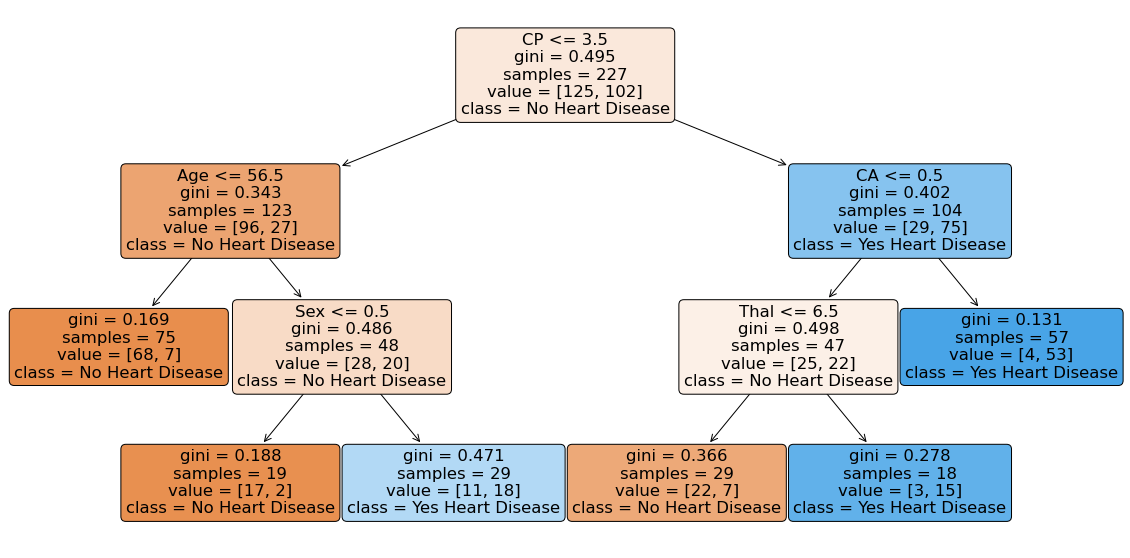

In [69]:
# Create a plot of the decision tree
plt.figure(figsize = (20, 10))
plot_tree(dt_pruned, filled=True, rounded = True, class_names = ["No Heart Disease", "Yes Heart Disease"], feature_names = X.columns)

**Interpreting the Tree:**

* At the root, we start with *CP* - i.e., chest pain. If an observation's value for the *CP* variable is less than or equal to 3.5, then we go to the left. Otherwise we go to the right.
* Each node specifies a threshold for splitting. If the the threshold condition is met, move left. Otherwise, go right.
* The value for "gini" is understood to be the *ginni index* representing the individual score for the node.
* In each node, the value for *samples* tells us how many samples are contained in the node.
* "value" indicates the number of samples that are in each category. In this case, there are two categories: *No Heart disease* and *Yes Heart Disease*. Note that the number of patients in the *No Heart Disease* category are listed first because the categories are in alphabetical order. For example, the root node has 125 patients in the *No Heart Disease* category. On the other hand, there are 102 patients in the *Yes Heart Disease* category.
* "Class" indicates which category is the most dominate in the node.
* Leaves do not have thresholds for splitting.
* Each node and leaf is colored based on its class. Orange represents the *No Heart Disease* class and blue represents the *Yes Heart Disease* class. The darker the color the lower the gini score.

## 9. Summary and Results

In this project I built a decision tree that classifies patients as either having heart disease or not having heart disease. Cost complexity pruning and cross validation were employed to create the most optimal calssification tree. The result was a decision tree that was 76.9% accurate at classifying patients that do not have heart disease, and 81% accurate at classifying patients that have heart disease.